In [2]:
import os
import pandas as pd
import re
import nltk
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
import transformers
import tokenizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import DistilBertTokenizerFast
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from keras.layers import SimpleRNN,Dense,Activation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')


C:\Users\mabha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mabha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mabha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mabha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mabha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_csv("IMDB_Dataset.csv")

In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Preprocessing


In [7]:
def lowercase_text(text):
    return text.lower()

def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def join_tokens(tokens):
    return ' '.join(tokens)

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    
    clean_text = soup.get_text()
    
    return clean_text


def replace_negations(text):
    negation_dict = {
        "won't": "will not",
        "can't": "cannot",
        "n't": " not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "won't": "will not",
        "wouldn't": "would not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not"
    }
    
    for negation_word, replacement in negation_dict.items():
        text = re.sub(r"\b" + re.escape(negation_word) + r"\b", replacement, text)
    
    return text


def remove_non_ascii(text):
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    return cleaned_text

def remove_html_break_tags(text):
    HTML_TAG_PATTERN = re.compile(r'<br\s?/?>')
    cleaned_text = HTML_TAG_PATTERN.sub('', text)
    return cleaned_text


def remove_emojis(text):
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F700-\U0001F77F"  
                               u"\U0001F780-\U0001F7FF"  
                               u"\U0001F800-\U0001F8FF" 
                               u"\U0001F900-\U0001F9FF"  
                               u"\U0001FA00-\U0001FA6F"  
                               u"\U0001FA70-\U0001FAFF"  
                               u"\U0001F004-\U0001F0CF"  
                               u"\U0001F170-\U0001F251" 
                               "]+", flags=re.UNICODE)

    
    clean_text = emoji_pattern.sub('', text)
    return clean_text


In [ ]:

df["review"] = df["review"].apply(remove_html_tags)
df["review"] = df["review"].apply(remove_html_break_tags)
df['review'] = df["review"].apply(lowercase_text)
df["review"] = df["review"].apply(replace_negations)
df["review"] = df["review"].apply(remove_non_ascii)
df['review'] = df["review"].apply(tokenize_text)
df["review"] = df["review"].apply(remove_stopwords)
df["review"] = df["review"].apply(lemmatize_text)
df['final_text'] = df["review"].apply(join_tokens)
df['final_text'] = df['final_text'].apply(clean_text)
df['final_text'] = df['final_text'].apply(remove_emojis)
df['final_text'] = df['final_text'].str.replace(r'\bs\b', "", regex=True, case=False)
df['final_text'] = df['final_text'].str.replace(r'\bnt\b', "not", regex=True, case=False)


C:\Users\mabha\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
df

In [ ]:
df["final_text"]

# Exploratory Data Analysis

In [ ]:
df['sentiment'].value_counts(normalize = True)

In [ ]:

num_documents = len(df)
avg_text_length = df['final_text'].apply(len).mean()
text_length_stats = df['final_text'].apply(len).describe()

print(f"Number of documents: {num_documents}")
print(f"Average text length: {avg_text_length:.2f}")
print("Text length statistics:\n", text_length_stats)


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Sentiment Class Distribution")
plt.show()

We can see that the datapoints are balanced in the two sentiment classes.

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['final_text'].apply(len), bins=30, kde=True)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.show()

In [ ]:
word_freq = Counter(' '.join(df['final_text']).split())

most_common_word, highest_freq = word_freq.most_common(1)[0]

print(f"The word with the highest frequency is '{most_common_word}' with a frequency of {highest_freq}.")

In [ ]:

combined_text = ' '.join(df['final_text'])
word_freq = Counter(combined_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()


In [ ]:
def wordcloud(df, text = 'final_text'):
    
    corpus = " ".join(str(review) for review in df[text])
    
    print (f"There are {len(corpus)} words in the combination of all review.")
    
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          collocations=False,
                          background_color="white").generate(corpus)
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:

positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']
print('Positive Wordcloud')
wordcloud(df = positive)

print('Negative Wordcloud')
wordcloud(df = negative)

# Sentiment Analysis Using ML Models

In [18]:
train, test= train_test_split(df, test_size=0.2, random_state=1)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']
Xtrain = Xtrain.astype(str).tolist()
Xtest = Xtest.astype(str).tolist()

In [19]:
tfidf_vect = TfidfVectorizer() 
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() 
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

In [20]:
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
print('Classification Report: \n', classification_report(ytest, p1, target_names = ['Negative', 'Positive']))
print('Accuracy score: \n', accuracy_score(ytest, p1))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      5044
    Positive       0.88      0.91      0.90      4956

    accuracy                           0.89     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.89      0.89     10000

Accuracy score: 
 0.8949


In [21]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p2=linear_svc.predict(Xtest_tfidf)
print('Classification Report: \n', classification_report(ytest, p2, target_names = ['Negative', 'Positive']))
print('Accuracy score: \n', accuracy_score(ytest, p2))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      5044
    Positive       0.89      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Accuracy score: 
 0.9008


#  Semtiment Analysis Using DL Models

In [22]:
movie_reviews = df['review'].values
sentiment_class = df['sentiment'].values
encoder = LabelEncoder()
encoded_sentiment_class = encoder.fit_transform(sentiment_class)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(movie_reviews, encoded_sentiment_class, stratify = encoded_sentiment_class,random_state=1,test_size=0.2)

In [23]:
size = 3000
tok = ''
embedding = 100
max_length = 200 
tokenizer = Tokenizer(num_words = size, oov_token=tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

# RNN Model

In [24]:
rnn = Sequential()
rnn.add(Embedding(size,32,input_length =max_length))
rnn.add(SimpleRNN(16,input_shape = (size,max_length), return_sequences=False,activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           96000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 96801 (378.13 KB)
Trainable params: 96801 (378.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
tensorflow.random.set_seed(1)
history = rnn.fit(train_padded, train_labels, batch_size=32,epochs= 10, verbose=1,validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 33s 29ms/step - loss: 0.6917 - accuracy: 0.5128 - val_loss: 0.6850 - val_accuracy: 0.5312
Epoch 2/10
1125/1125 [==============================] - 30s 27ms/step - loss: 0.5971 - accuracy: 0.6700 - val_loss: 0.4868 - val_accuracy: 0.8033
Epoch 3/10
1125/1125 [==============================] - 30s 27ms/step - loss: 0.4824 - accuracy: 0.8044 - val_loss: 0.4754 - val_accuracy: 0.8070
Epoch 4/10
1125/1125 [==============================] - 37s 33ms/step - loss: 0.4579 - accuracy: 0.8241 - val_loss: 1.0445 - val_accuracy: 0.7100
Epoch 5/10
1125/1125 [==============================] - 35s 32ms/step - loss: 0.4383 - accuracy: 0.8298 - val_loss: 0.4231 - val_accuracy: 0.8288
Epoch 6/10
1125/1125 [==============================] - 35s 31ms/step - loss: 0.4024 - accuracy: 0.8446 - val_loss: 0.4059 - val_accuracy: 0.8378
Epoch 7/10
1125/1125 [==============================] - 35s 31ms/step - loss: 0.3908 - accuracy: 0.8537 - val_loss: 0.4100 -

In [26]:
print("Evaluate Model Performance on Test set")
result = rnn.evaluate(test_padded,test_labels)
print(dict(zip(rnn.metrics_names, result)))

Evaluate Model Performance on Test set
313/313 [==============================] - 3s 8ms/step - loss: 0.3904 - accuracy: 0.8508
{'loss': 0.3904312252998352, 'accuracy': 0.8507999777793884}


# LSTM Model 

In [27]:
optimizer='adam'
loss='binary_crossentropy'
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Embedding(size, embedding, input_length=max_length),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(128, return_sequences=True)),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64)),
    tensorflow.keras.layers.Dense(24, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 200, 256)          234496    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 701969 (2.68 MB)
Trainable params: 70196

In [28]:
tensorflow.random.set_seed(1)
training = model.fit(train_padded, train_labels, batch_size=32, 
                    epochs= 10, verbose=1, 
                    validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 685s 603ms/step - loss: 0.6509 - accuracy: 0.6248 - val_loss: 0.6568 - val_accuracy: 0.6417
Epoch 2/10
1125/1125 [==============================] - 459s 408ms/step - loss: 0.4780 - accuracy: 0.7742 - val_loss: 0.3250 - val_accuracy: 0.8683
Epoch 3/10
1125/1125 [==============================] - 478s 425ms/step - loss: 0.2810 - accuracy: 0.8834 - val_loss: 0.2733 - val_accuracy: 0.8885
Epoch 4/10
1125/1125 [==============================] - 524s 466ms/step - loss: 0.2432 - accuracy: 0.9017 - val_loss: 0.2615 - val_accuracy: 0.8940
Epoch 5/10
1125/1125 [==============================] - 495s 440ms/step - loss: 0.2109 - accuracy: 0.9181 - val_loss: 0.2928 - val_accuracy: 0.8813
Epoch 6/10
1125/1125 [==============================] - 535s 476ms/step - loss: 0.1875 - accuracy: 0.9280 - val_loss: 0.2955 - val_accuracy: 0.8800
Epoch 7/10
1125/1125 [==============================] - 596s 530ms/step - loss: 0.1621 - accuracy: 0.9396 - val_

In [29]:
print("Evaluate Model Performance on Test set")
result1 = model.evaluate(test_padded,test_labels)
print(dict(zip(model.metrics_names, result1)))

Evaluate Model Performance on Test set
313/313 [==============================] - 80s 251ms/step - loss: 0.4274 - accuracy: 0.8668
{'loss': 0.42743945121765137, 'accuracy': 0.8668000102043152}


# Improved LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(size, 64, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=optimizer, 
    metrics=['accuracy']
)
model.summary()

In [31]:
tensorflow.random.set_seed(1)
training = model.fit(train_padded, train_labels, batch_size=32, 
                    epochs= 10, verbose=1, 
                    validation_split=0.1)

Epoch 1/10


C:\Users\mabha\anaconda3\lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1125/1125 [==============================] - 282s 243ms/step - loss: 0.5111 - accuracy: 0.7544 - val_loss: 0.3803 - val_accuracy: 0.8242
Epoch 2/10
1125/1125 [==============================] - 519s 462ms/step - loss: 0.3569 - accuracy: 0.8493 - val_loss: 0.3364 - val_accuracy: 0.8630
Epoch 3/10
1125/1125 [==============================] - 253s 225ms/step - loss: 0.3181 - accuracy: 0.8709 - val_loss: 0.3034 - val_accuracy: 0.8685
Epoch 4/10
1125/1125 [==============================] - 249s 221ms/step - loss: 0.2985 - accuracy: 0.8786 - val_loss: 0.2931 - val_accuracy: 0.8723
Epoch 5/10
1125/1125 [==============================] - 254s 226ms/step - loss: 0.3009 - accuracy: 0.8770 - val_loss: 0.3221 - val_accuracy: 0.8633
Epoch 6/10
1125/1125 [==============================] - 256s 228ms/step - loss: 0.2883 - accuracy: 0.8810 - val_loss: 0.3136 - val_accuracy: 0.8618
Epoch 7/10
1125/1125 [==============================] - 254s 226ms/step - loss: 0.2889 - accuracy: 0.8823 - val_loss: 0.328

In [33]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_padded,test_labels)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
313/313 [==============================] - 19s 57ms/step - loss: 0.3161 - accuracy: 0.8665
{'loss': 0.31605392694473267, 'accuracy': 0.8665000200271606}


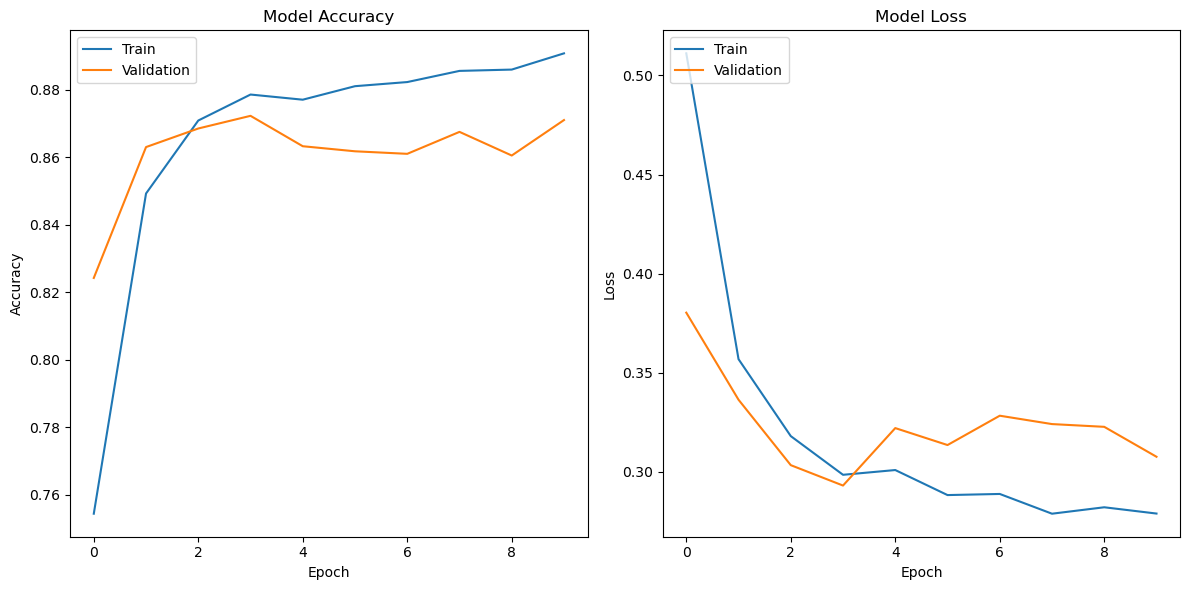

In [34]:
history = training.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [35]:
sentence = ["I really enjoyed it. Its made more for the fans. Not critics.", 
            "I was more bored than scared.", 
            "Five Nights at Freddy’s commits the worst crime of all – it’s dull from beginning to end. It’s a frustrating miss on a premise and franchise that can be so much more."]
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, padding='post', maxlen=max_length)

prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'bhjiji
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 2s 2s/step
I really enjoyed it. Its made more for the fans. Not critics.
Predicted sentiment :  Positive
I was more bored than scared.
Predicted sentiment :  Negative
Five Nights at Freddy’s commits the worst crime of all – it’s dull from beginning to end. It’s a frustrating miss on a premise and franchise that can be so much more.
Predicted sentiment :  Negative
